# 6.3 - Geographical Visualizations with Python - Ivan Dimitrov

## 1. Import data and libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
from folium.plugins import MarkerCluster

In [2]:
#Ensuring we see the full Latitudes and Longitudes
pd.set_option('display.precision', 10)

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Import ".json" file for the U.S. map
country_geo = r'C:\Users\ivand\Desktop\6.1 - CitiBike Project Folder\02 Data\Original Data\US map custom.geo.json'

In [5]:
country_geo

'C:\\Users\\ivand\\Desktop\\6.1 - CitiBike Project Folder\\02 Data\\Original Data\\US map custom.geo.json'

In [6]:
# Creating a path
path = r"C:\Users\ivand\Desktop\6.1 - CitiBike Project Folder"

In [7]:
# Importing the cleaned Bike data
df_bikes = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','CitiBike_Cleaned.csv'),index_col=False)

In [8]:
df_bikes.head()

,Unnamed: 0,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_minutes,subscriber,year_of_birth,gender
0,0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.75466591,-73.99138152,2013-09-09 18:35:28,W 20 St & 7 Ave,40.74238787,-73.99726235,993,Subscriber,1968,Female
1,1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.71939226,-74.00247214,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.72841860,-73.98713956,581,Subscriber,1983,Male
2,2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.76019252,-73.99125510,2013-09-18 19:50:05,W 56 St & 10 Ave,40.76825400,-73.98863900,361,Subscriber,1989,Male
3,3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.74315566,-73.97434726,2013-09-28 12:03:58,E 52 St & 2 Ave,40.75601400,-73.96741600,561,Subscriber,1988,Female
4,4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.75044999,-73.99481051,2013-09-07 18:46:38,E 31 St & 3 Ave,40.74394314,-73.97966069,2296,Non-Subscriber,1978,Unknown


## 2. Data Wrangling

In [9]:
# Dropping "Unnamed: 0" column
df_bikes = df_bikes.drop(columns = ['Unnamed: 0'])

In [10]:
# Checking data shape
df_bikes.shape

(49927, 13)

In [11]:
# Checking the data
df_bikes.head()

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_minutes,subscriber,year_of_birth,gender
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.75466591,-73.99138152,2013-09-09 18:35:28,W 20 St & 7 Ave,40.74238787,-73.99726235,993,Subscriber,1968,Female
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.71939226,-74.00247214,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.72841860,-73.98713956,581,Subscriber,1983,Male
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.76019252,-73.99125510,2013-09-18 19:50:05,W 56 St & 10 Ave,40.76825400,-73.98863900,361,Subscriber,1989,Male
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.74315566,-73.97434726,2013-09-28 12:03:58,E 52 St & 2 Ave,40.75601400,-73.96741600,561,Subscriber,1988,Female
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.75044999,-73.99481051,2013-09-07 18:46:38,E 31 St & 3 Ave,40.74394314,-73.97966069,2296,Non-Subscriber,1978,Unknown


In [12]:
# Checking the columns
df_bikes.columns

Index(['day_of_week', 'start_of_ride', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_of_ride',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration_in_minutes', 'subscriber', 'year_of_birth', 'gender'],
      dtype='object')

In [13]:
df_bikes

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_minutes,subscriber,year_of_birth,gender
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.75466591,-73.99138152,2013-09-09 18:35:28,W 20 St & 7 Ave,40.74238787,-73.99726235,993,Subscriber,1968,Female
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.71939226,-74.00247214,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.72841860,-73.98713956,581,Subscriber,1983,Male
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.76019252,-73.99125510,2013-09-18 19:50:05,W 56 St & 10 Ave,40.76825400,-73.98863900,361,Subscriber,1989,Male
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.74315566,-73.97434726,2013-09-28 12:03:58,E 52 St & 2 Ave,40.75601400,-73.96741600,561,Subscriber,1988,Female
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.75044999,-73.99481051,2013-09-07 18:46:38,E 31 St & 3 Ave,40.74394314,-73.97966069,2296,Non-Subscriber,1978,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49922,Sat,2013-09-21 18:39:20,9 Ave & W 45 St,40.76019252,-73.99125510,2013-09-21 20:08:59,11 Ave & W 41 St,40.76030096,-73.99884222,2697,Non-Subscriber,1978,Unknown
49923,Sat,2013-09-14 17:32:26,Johnson St & Gold St,40.69474881,-73.98362464,2013-09-14 17:52:17,Cleveland Pl & Spring St,40.72181580,-73.99720307,1191,Subscriber,1970,Female
49924,Sat,2013-09-07 18:08:21,Broadway & E 22 St,40.74034320,-73.98955109,2013-09-07 18:25:51,W 43 St & 6 Ave,40.75527307,-73.98316936,1050,Subscriber,1961,Female
49925,Sat,2013-09-07 13:25:35,Ashland Pl & Hanson Pl,40.68528172,-73.97805813,2013-09-07 14:14:04,Willoughby Ave & Walworth St,40.69331716,-73.95381995,2697,Non-Subscriber,1978,Unknown


In [14]:
#Creating a GroupBy to give total uses by each 'start_station_name" in a new column.
df_bikes["uses_by_station"] = df_bikes.groupby("start_station_name")["start_station_name"].transform("count")

In [15]:
df_bikes

,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_minutes,subscriber,year_of_birth,gender,uses_by_station
0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.75466591,-73.99138152,2013-09-09 18:35:28,W 20 St & 7 Ave,40.74238787,-73.99726235,993,Subscriber,1968,Female,226
1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.71939226,-74.00247214,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.72841860,-73.98713956,581,Subscriber,1983,Male,118
2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.76019252,-73.99125510,2013-09-18 19:50:05,W 56 St & 10 Ave,40.76825400,-73.98863900,361,Subscriber,1989,Male,226
3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.74315566,-73.97434726,2013-09-28 12:03:58,E 52 St & 2 Ave,40.75601400,-73.96741600,561,Subscriber,1988,Female,207
4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.75044999,-73.99481051,2013-09-07 18:46:38,E 31 St & 3 Ave,40.74394314,-73.97966069,2296,Non-Subscriber,1978,Unknown,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49922,Sat,2013-09-21 18:39:20,9 Ave & W 45 St,40.76019252,-73.99125510,2013-09-21 20:08:59,11 Ave & W 41 St,40.76030096,-73.99884222,2697,Non-Subscriber,1978,Unknown,226
49923,Sat,2013-09-14 17:32:26,Johnson St & Gold St,40.69474881,-73.98362464,2013-09-14 17:52:17,Cleveland Pl & Spring St,40.72181580,-73.99720307,1191,Subscriber,1970,Female,61
49924,Sat,2013-09-07 18:08:21,Broadway & E 22 St,40.74034320,-73.98955109,2013-09-07 18:25:51,W 43 St & 6 Ave,40.75527307,-73.98316936,1050,Subscriber,1961,Female,299
49925,Sat,2013-09-07 13:25:35,Ashland Pl & Hanson Pl,40.68528172,-73.97805813,2013-09-07 14:14:04,Willoughby Ave & Walworth St,40.69331716,-73.95381995,2697,Non-Subscriber,1978,Unknown,111


In [16]:
# Creating a list of only the necessary columns
columns = ['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','subscriber','year_of_birth','gender','uses_by_station']

In [17]:
# Creating a subset
df_sub = df_bikes[columns]

In [18]:
# Checking the subset
df_sub.head()

,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,subscriber,year_of_birth,gender,uses_by_station
0,W 38 St & 8 Ave,W 20 St & 7 Ave,40.75466591,-73.99138152,40.74238787,-73.99726235,Subscriber,1968,Female,226
1,Lispenard St & Broadway,St Marks Pl & 2 Ave,40.71939226,-74.00247214,40.72841860,-73.98713956,Subscriber,1983,Male,118
2,9 Ave & W 45 St,W 56 St & 10 Ave,40.76019252,-73.99125510,40.76825400,-73.98863900,Subscriber,1989,Male,226
3,E 33 St & 1 Ave,E 52 St & 2 Ave,40.74315566,-73.97434726,40.75601400,-73.96741600,Subscriber,1988,Female,207
4,8 Ave & W 31 St,E 31 St & 3 Ave,40.75044999,-73.99481051,40.74394314,-73.97966069,Non-Subscriber,1978,Unknown,410


## 3. Consistency checks

In [19]:
# Check the subset for missing values
df_sub.isnull().sum()

start_station_name         0
end_station_name           0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
subscriber                 0
year_of_birth              0
gender                     0
uses_by_station            0
dtype: int64

no missing values

In [20]:
# Checking for duplicates
dups = df_sub.duplicated()

In [21]:
dups.shape

(49927,)

no duplicates found

<Axes: xlabel='year_of_birth', ylabel='Count'>

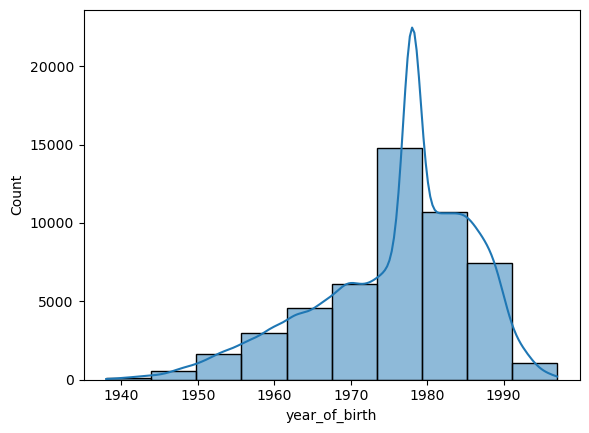

In [22]:
# Checking "year_of_birth" for outliers
sns.histplot(df_sub['year_of_birth'], bins = 10, kde = True)

Birth year outliers were removed when creating a segment for people up to 80 years old

<Axes: xlabel='gender', ylabel='Count'>

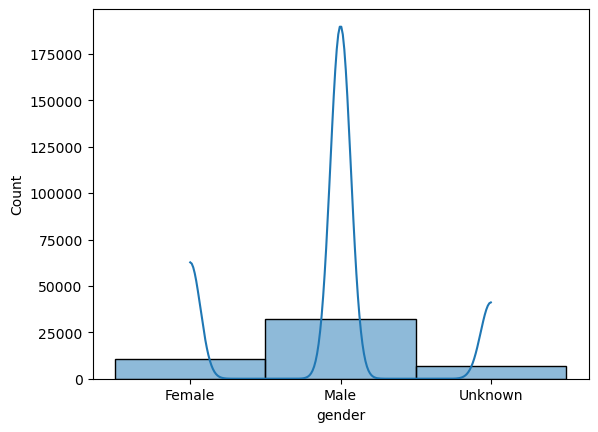

In [23]:
# Checking the distribution of genders
sns.histplot(df_sub['gender'], bins = 10, kde = True)

There are mostly male users. The Unknown though it may seem concerning for the analysis we will keep it as not everyone is willing to give out their gender, but their data is still valuable.

## 4. Creating a Choropleth map

In [24]:
# Viewing the two variables which we'll use for the map
df_sub[['start_station_name', 'uses_by_station']].tail(20)

,start_station_name,uses_by_station
49907,E 14 St & Avenue B,173
49908,Barrow St & Hudson St,283
49909,E 4 St & 2 Ave,232
49910,Broadway & Berry St,43
49911,E 55 St & 2 Ave,116
49912,South St & Gouverneur Ln,140
49913,Broadway & W 53 St,228
49914,Vesey Pl & River Terrace,292
49915,W 56 St & 6 Ave,213
49916,Bank St & Hudson St,178


In [25]:
# Removing eventual duplicates
df_sub = df_sub.drop_duplicates(subset = ["start_station_name"])

In [26]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 12744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_station_name       330 non-null    object 
 1   end_station_name         330 non-null    object 
 2   start_station_latitude   330 non-null    float64
 3   start_station_longitude  330 non-null    float64
 4   end_station_latitude     330 non-null    float64
 5   end_station_longitude    330 non-null    float64
 6   subscriber               330 non-null    object 
 7   year_of_birth            330 non-null    int64  
 8   gender                   330 non-null    object 
 9   uses_by_station          330 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 28.4+ KB


In [27]:
# Checking the subset
df_sub[['start_station_name', 'uses_by_station']].head()

,start_station_name,uses_by_station
0,W 38 St & 8 Ave,226
1,Lispenard St & Broadway,118
2,9 Ave & W 45 St,226
3,E 33 St & 1 Ave,207
4,8 Ave & W 31 St,410


In [28]:
# Changing the "uses_by_station" to a string in order for folium to work
df_sub['uses_by_stationSTR'] = df_sub['uses_by_station'].astype('str')

In [29]:
# Creating the map
m = folium.Map(location = [40.719587, -74.046089], tiles = 'OpenStreetMap', zoom_start=12)

markerCluster = MarkerCluster().add_to(m)

for i, row in df_sub.iterrows():
    lat = df_sub.at[i, 'start_station_latitude']
    lng = df_sub.at[i, 'start_station_longitude']
    
    popup = 'Station : ' + str(df_sub.at[i, 'start_station_name']) + '<br>' + 'Uses : ' + df_sub.at[i, 'uses_by_stationSTR']

    folium.Marker(location = [lat, lng], popup= popup, icon = folium.Icon(color='blue', icon='fire')).add_to(markerCluster)
m

In [30]:
# Viewing the two variables which we'll use for the map
df_sub[['end_station_name', 'uses_by_station']].head()

,end_station_name,uses_by_station
0,W 20 St & 7 Ave,226
1,St Marks Pl & 2 Ave,118
2,W 56 St & 10 Ave,226
3,E 52 St & 2 Ave,207
4,E 31 St & 3 Ave,410


In [31]:
# Removing eventual duplicates
df_sub = df_sub.drop_duplicates(subset = ["end_station_name"])

In [32]:
# Creating the map
map = folium.Map(location = [40.719587, -74.046089], tiles = 'OpenStreetMap', zoom_start=12)

markerCluster = MarkerCluster().add_to(map)

for i, row in df_sub.iterrows():
    lat = df_sub.at[i, 'end_station_latitude']
    lng = df_sub.at[i, 'end_station_longitude']
    
    popup = 'Station : ' + str(df_sub.at[i, 'end_station_name']) + '<br>' + 'Uses : ' + df_sub.at[i, 'uses_by_stationSTR']

    folium.Marker(location = [lat, lng], popup= popup, icon = folium.Icon(color='blue', icon='fire')).add_to(markerCluster)
map

# 5. Conclusions

- Which start station is most commonly used?
We see that mostly stations around the areas of Manhattan and Brooklyn. B ut the most used stations are around Lower Manhattan.
- Which start station is least commonly used?
That would be east of Lower Manhattan towards Brooklyn
- Which end station is most commonly used? Which is least?
End stations are more focused around Lower Manhattan which means that users mostly take the bikes to travel towards the inside of the city instead of towards the outside.